# Lending Club

Name: Ajay Thakur

The projects analysis the lending dataset to predict if loan will default. 

__Plan__:
1. Observe the input features by:
   - Data distribution of various features 
   - Analyzing IQR (Inter Quartile Range) of various features
   - Bar plot of `purpose`
2. No missing data or null was obseved 
3. Feature engineerins:
   - Remove skewness by apply log transformations
   - Cap outliers at 99%
   - Remove correlated columns
   - Encoded the categorical columns `purpose`
4. Modeling:
   - Create X_train, X_test, y_train and y_test
   - Test and measure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
data = pd.read_csv("./data/project/lending_loan_data.csv")
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

__Observation:__ All data is valid.

## Exploratory data analysis

This section analysis various data for checking distribution and box plot.



In [7]:
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
                  'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
                  'delinq.2yrs', 'pub.rec']

### Data Distribtions

Some observations are:

1. `int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.util`: These variables show relatively normal or slightly skewed distributions, with no extreme outliers dominating the plots. __No cleanup needed__.
2.  `revol.bal`: Highly right-skewed with a long tail and a peak near zero. This suggests a few borrowers have extremely high revolving balances, which could skew the model. __Apply log transformation or capping extreme values__.
3. `inq.last.6mths, delinq.2yrs, pub.rec`: These features are heavily skewed with most values clustered at 0 or low numbers and rare occurrences of higher values. This sparsity may indicate outliers or rare events. Consider capping these at a reasonable threshold (e.g., 10 for inq.last.6mths, 5 for delinq.2yrs, 2 for pub.rec) or using a transformation.
4. `Overall`: The distributions suggest that some features may benefit from transformation (e.g., log or square root) to reduce skewness before modeling.

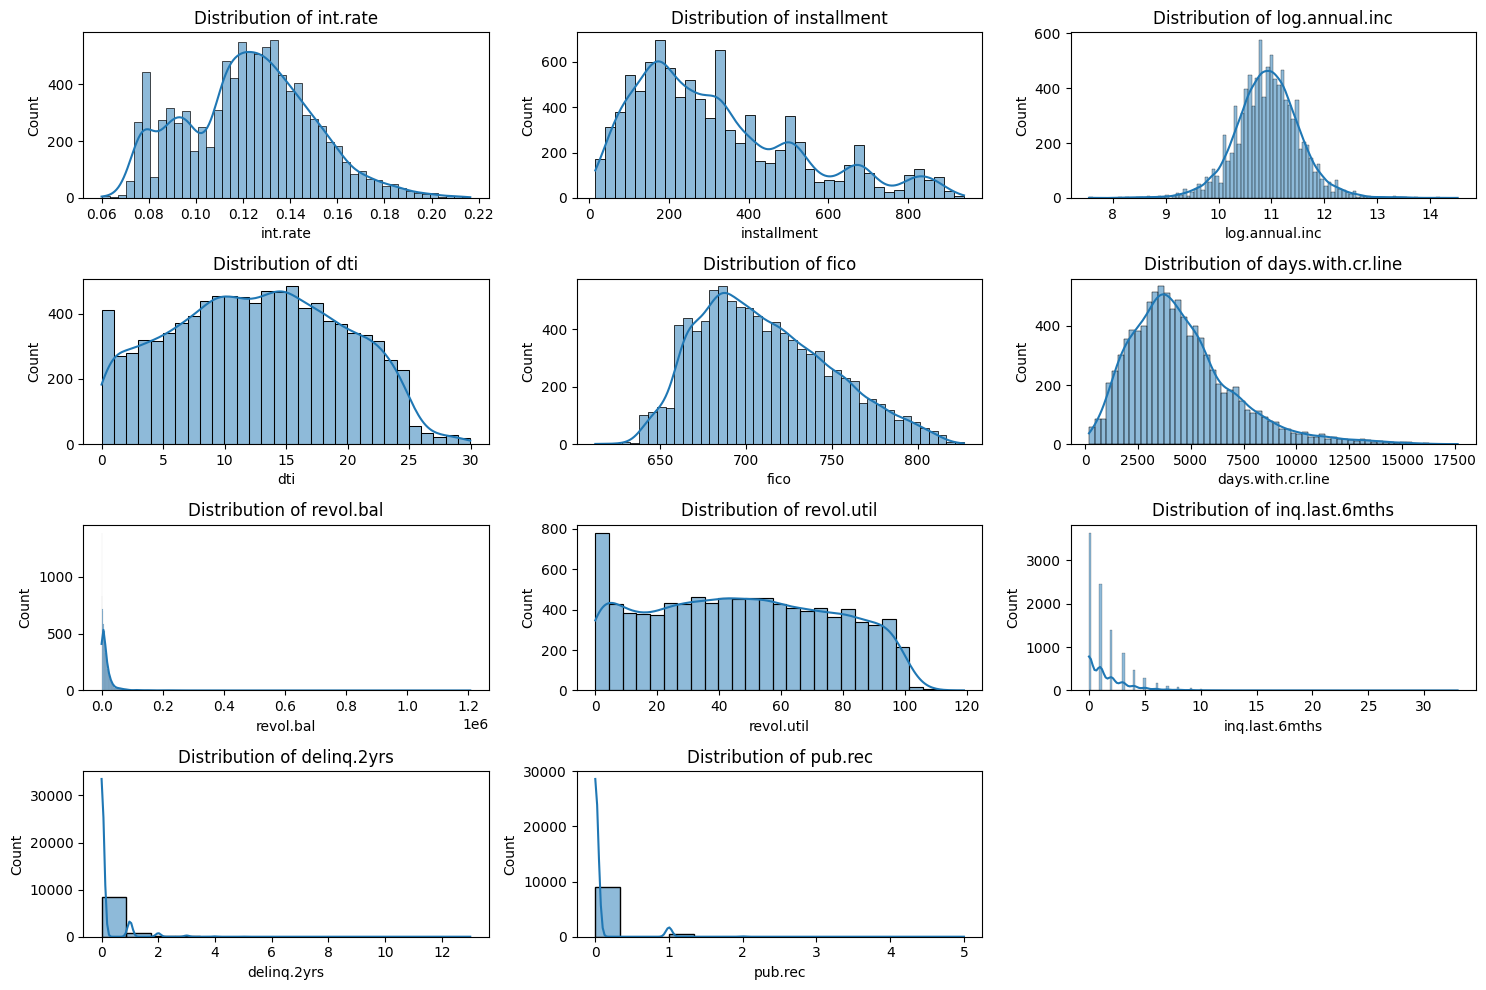

In [8]:
# Histograms for numerical features

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Boxplot Observations

1. `int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.util`: These show moderate interquartile ranges with some outliers (points beyond the whiskers). The outliers in `fico` (below 650) and `days.with.cr.line` (above 15,000) might be valid but should be reviewed for data entry errors or extreme cases. *May consider capping* or removing if they are errors.
2. `revol.bal`: Significant outliers with values far exceeding the upper whisker (e.g., >1.0). These extreme values could be influential and may need capping or transformation.
3. `inq.last.6mths, delinq.2yrs, pub.rec`: Numerous outliers due to the skewed nature. For `delinq.2yrs` and `pub.rec`, values beyond 5-10 appear rare and might be candidates for capping or investigation for accuracy.
4. `Overall`: Outliers are present, especially in skewed features. Capping at the 95th or 99th percentile or applying a robust scaler (e.g., IQR-based) could help mitigate their impact.

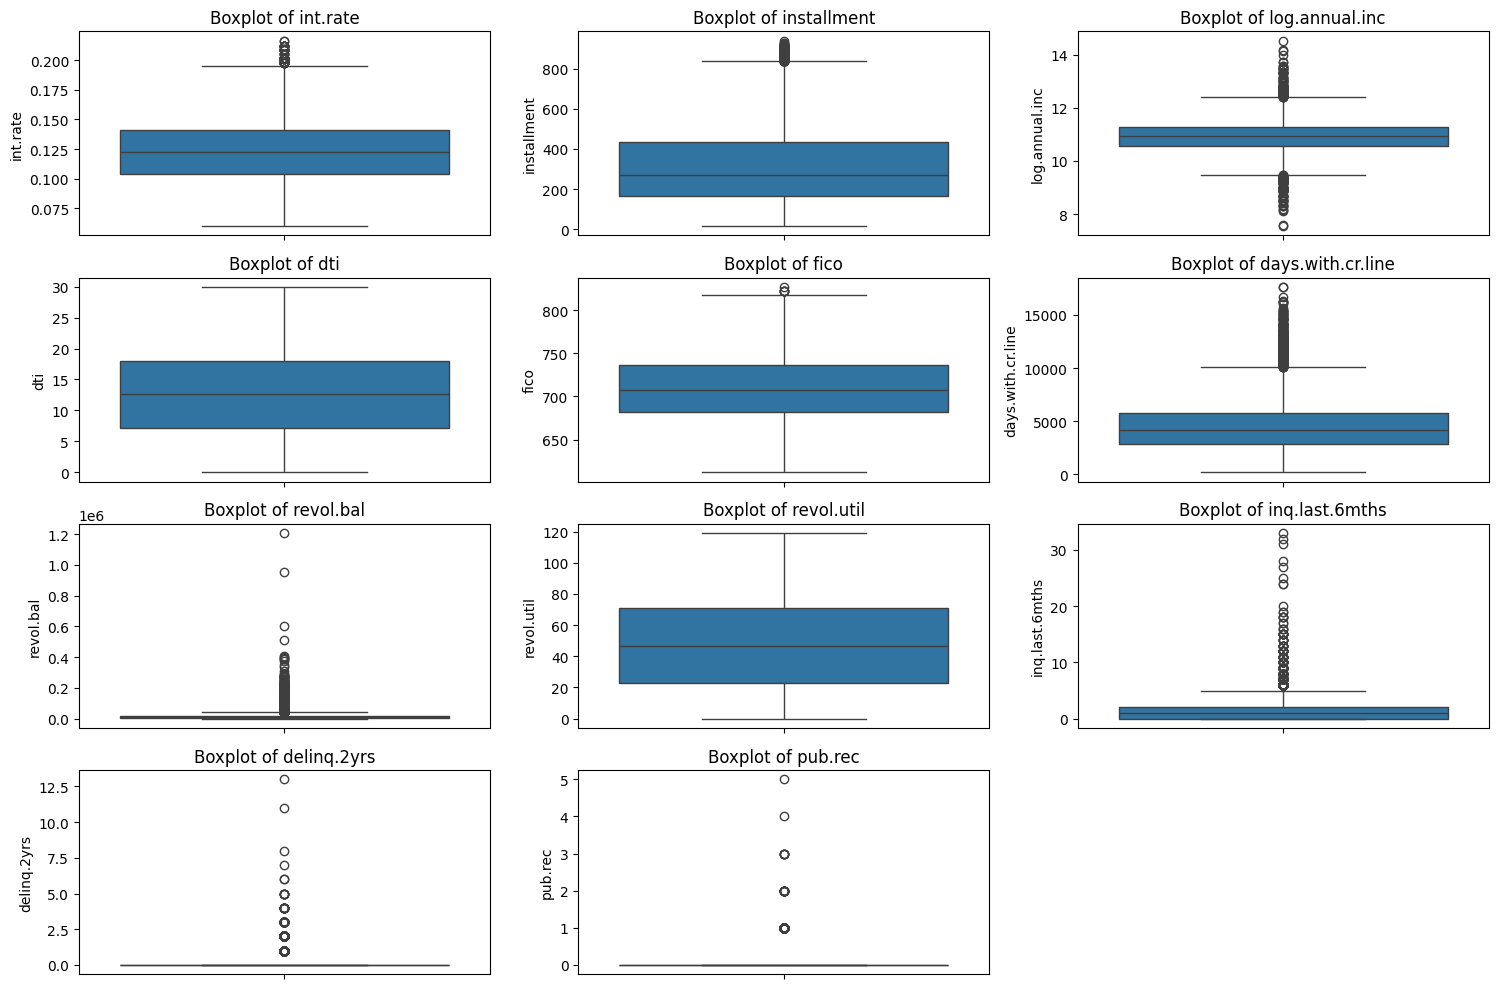

In [9]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## Bar Plot (Loan Purpose)

The distribution is uneven, with `debt_consolidation` and `all_other` being the most common purposes, while `educational` is the least. This imbalance is not a data quality issue but may affect model performance. Consider using stratified sampling or class weights during modeling rather than data cleanup.

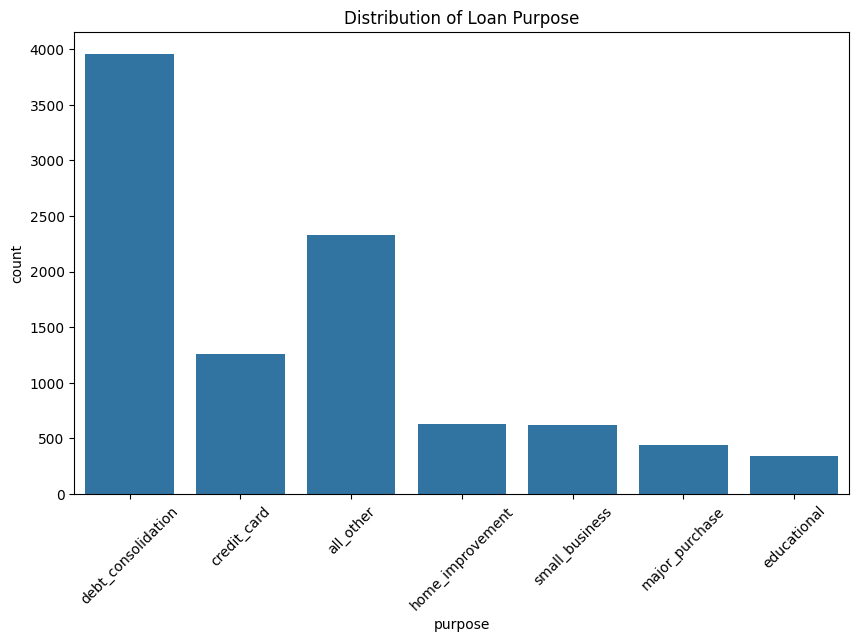

In [10]:
# Bar plot for categorical variable 'purpose'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='purpose')
plt.title('Distribution of Loan Purpose')
plt.xticks(rotation=45)
plt.show()

### Recommendations for Data Cleanup
1. **Transformation:** Apply a log transformation to `"revol.bal"` and consider it for `"inq.last.6mths", "delinq.2yrs", and "pub.rec"` to handle skewness.
Outlier Handling: Cap extreme values at the 99th percentile for `"revol.bal", "inq.last.6mths", "delinq.2yrs", and "pub.rec"`. Review "fico" and `"days.with.cr.line"` outliers for potential errors.
2. **Validation:** Cross-check outliers with domain knowledge or additional data if available to ensure they are not data entry mistakes.
No Removal: Avoid removing rows unless outliers are confirmed as errors, given the dataset's size (9578 entries).
This cleanup will help improve model robustness without losing significant data. Let me know if you'd like me to search for more context or assist further!

In [11]:
# Remove 'not.fully.paid' column
data = data.drop('not.fully.paid', axis=1)

# Apply log transformation to skewed features
data['revol.bal'] = np.log1p(data['revol.bal'])
data['inq.last.6mths'] = np.log1p(data['inq.last.6mths'])
data['delinq.2yrs'] = np.log1p(data['delinq.2yrs'])
data['pub.rec'] = np.log1p(data['pub.rec'])

In [12]:
# Cap outliers at 99th percentile
for col in ['revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']:
    upper_limit = data[col].quantile(0.99)
    data[col] = data[col].clip(upper=upper_limit)

__Correlation Analysis__:

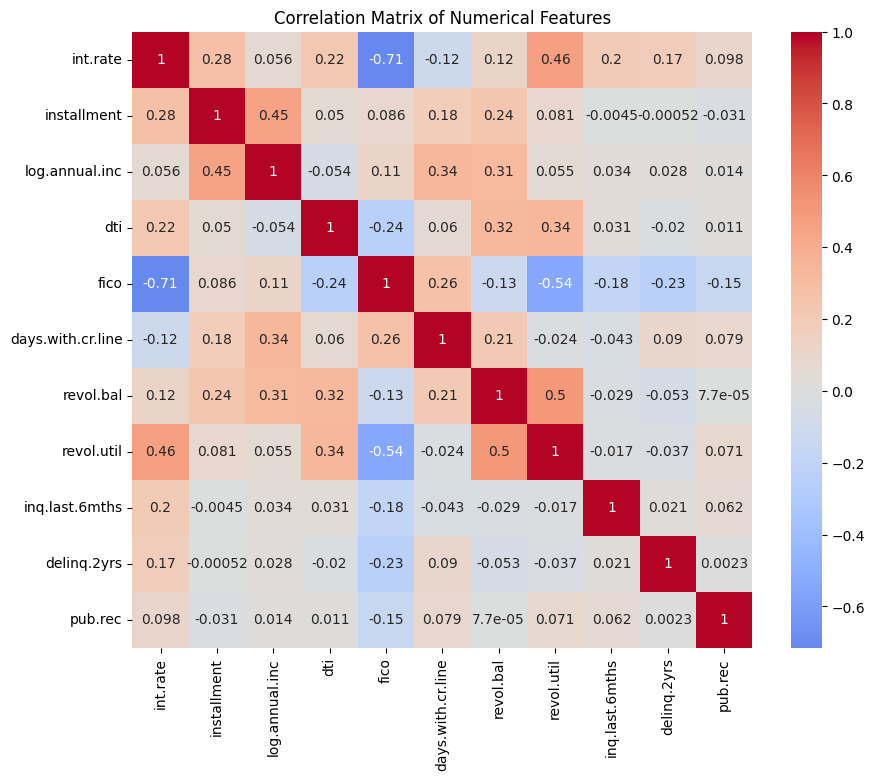

In [13]:
# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Feature Engineering

- Remove the highly correlated columns.
- Encode categorical variables, and remove original for training

In [14]:
# Drop highly correlated features (threshold > 0.7)
corr_threshold = 0.7
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

data = data.drop(to_drop, axis=1)

# Update numerical columns list after dropping correlated features
numerical_cols = [col for col in numerical_cols if col not in to_drop]

In [15]:
numerical_cols

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec']

In [16]:
# 3. One-hot encoding of categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
purpose_encoded = encoder.fit_transform(data[['purpose']])
purpose_columns = encoder.get_feature_names_out(['purpose'])
purpose_df = pd.DataFrame(purpose_encoded, columns=purpose_columns)
# Combine encoded features with numerical features
data = data.drop('purpose', axis=1)
data = pd.concat([data, purpose_df], axis=1)

In [17]:
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [19]:
X_train[:5], y_train[:5]

(      int.rate  installment  log.annual.inc    dti  days.with.cr.line  \
 2058    0.1568       310.64       10.279318  19.53        3738.000000   
 9316    0.1183       256.79       10.736310  13.31        4560.000000   
 5411    0.0894       413.03       10.861458  18.99        3209.958333   
 1166    0.1355       232.63       11.156251  24.22        3749.958333   
 8329    0.1450       137.69       10.566072  22.05        3269.000000   
 
       revol.bal  revol.util  inq.last.6mths  delinq.2yrs  pub.rec  \
 2058   9.994014        99.5        0.000000     0.000000      0.0   
 9316   8.931023        57.7        1.609438     0.000000      0.0   
 5411   9.574011        50.3        0.693147     0.000000      0.0   
 1166   9.053453        55.1        0.693147     0.693147      0.0   
 8329   9.062304        71.0        1.386294     0.000000      0.0   
 
       purpose_all_other  purpose_credit_card  purpose_debt_consolidation  \
 2058                0.0                  0.0          

In [20]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled[:5]

array([[0.61892583, 0.32373019, 0.41187389, 0.65186916, 0.20377865,
        0.83544564, 0.91452206, 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.37276215, 0.2646297 , 0.48077421, 0.44425901, 0.25085792,
        0.74658538, 0.53033088, 0.69897   , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.18797954, 0.43610343, 0.49964265, 0.63384513, 0.17353557,
        0.80033568, 0.46231618, 0.30103   , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.48273657, 0.23811405, 0.54408837, 0.80841121, 0.20446356,
        0.75681982, 0.50643382, 0.30103   , 0.59508892, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.54347826, 0.1339172 , 0.45510766, 0.735981

## Modelling

Use a DNN model with 4 dense layers and dropout layers. The accuracy of the model is 93%

In [22]:
# Build the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu',),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [23]:

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

In [26]:
# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.1,
                    epochs=200,
                    batch_size=32,
                    verbose=0, callbacks=[early_stopping])

In [27]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.1958
Test Accuracy: 0.9307


In [28]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
prediction_accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {prediction_accuracy:.4f}")

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
Prediction Accuracy: 0.9307


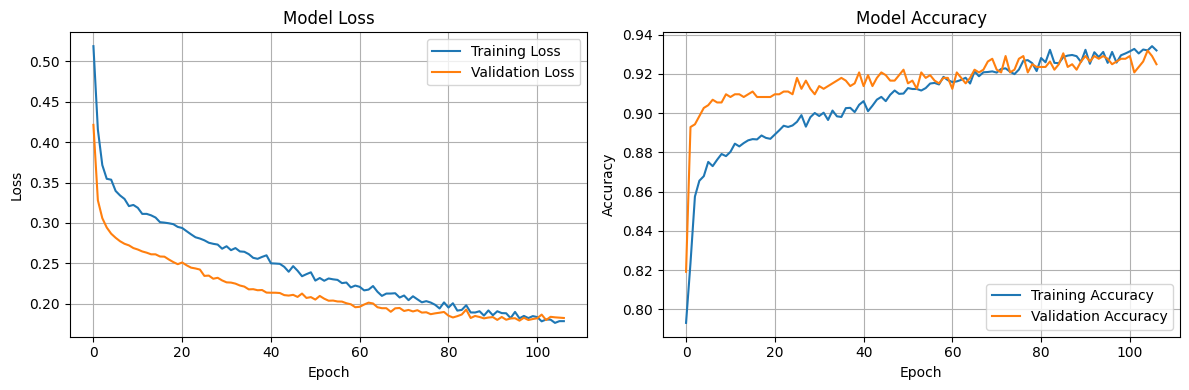

In [29]:
# Training history plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()